## NICE Biz info - 기업별 연봉현황 및 산업현황 데이터  크롤링
- https://www.nicebizinfo.com/cm/CM0100M001GE.nice
- **address**: 주소 / **industry**: 산업 / **ind_rank**: 산업평가종합등급 / **payroll**: 평균연봉 / **new_payroll**: 올해입사자 평균연봉 /**employee**: 종업원수 / **employment**: 입사율(연간입사자) / **resignation**: 퇴사율(연간퇴사자) / **cmp_years**: 업력
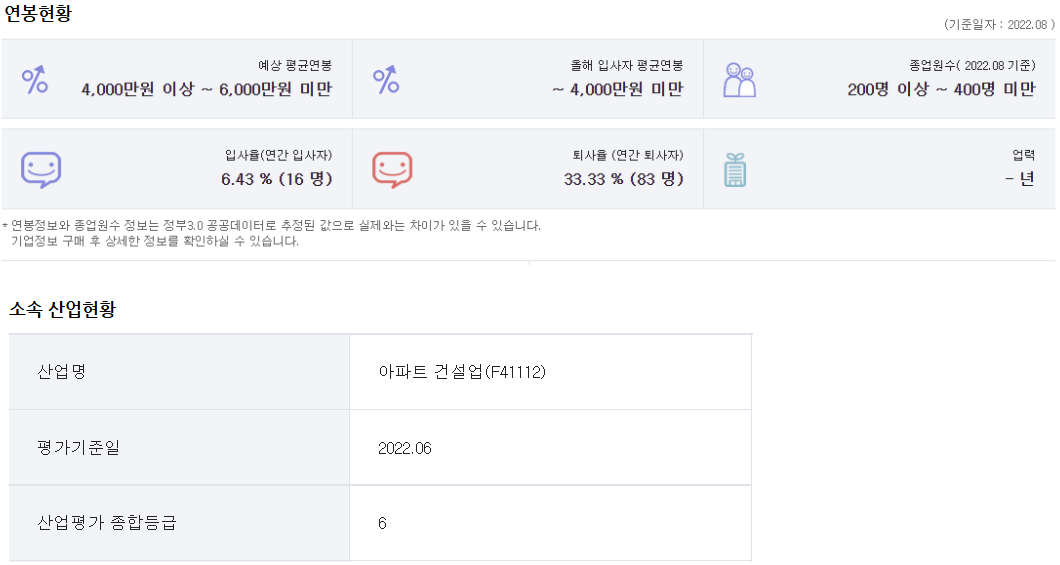

In [3]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import warnings
warnings.filterwarnings('ignore')

### 1) 재무데이터 사업자등록번호 불러오기 : 총 35,709개 (중복제거)

In [8]:
financial_data = pd.read_csv('data/재무데이터.txt', sep = "\t", encoding = "cp949", index_col=0)
f_index = financial_data.index.unique()
f_index

Int64Index([1018100340, 1018100772, 1018101126, 1018101242, 1018103819,
            1018104477, 1018104991, 1018106586, 1018115921, 1018116478,
            ...
            8988601448, 8988800633, 8988800759, 8998600312, 8998600665,
            8998700283, 8998701263, 8998800150, 8998800427, 8998800785],
           dtype='int64', name='사업자번호', length=35709)

### 2) 크롤링 코드

In [199]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.implicitly_wait(10)
time.sleep(0.2)
c_data = []

for i in range(len(f_index)):
    url = f'https://www.nicebizinfo.com/ep/EP0100M001GE.nice?itgSrch={str(f_index[i])}'
    driver.get(url)
    driver.implicitly_wait(10)
    time.sleep(0.2)
    try:        
        driver.find_element(By.CSS_SELECTOR,'td.no_result')
        address = industry = ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
        c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])
    except:
        try:
            driver.find_element(By.CSS_SELECTOR,'td.tar.bdr1').click()
            driver.implicitly_wait(10)
            time.sleep(0.2)
            page_source = driver.page_source 
            soup = bs(page_source, 'lxml')
            address = soup.select('div.iconBox.bg2 strong')[0].text
            industry = soup.select('div.iconBox.bg5 strong')[0].text
            try:
                rank = soup.select('div.cTable.sp2')[1]
                ind_rank = rank.select('td')[3].text.strip()        
            except:
                ind_rank = ''
            try: 
                table = soup.select('.cSection strong.fz16')
                payroll = table[0].text.strip()
                new_payroll = table[1].text.strip()
                employee = table[2].text.strip()
                employment = table[3].text.strip().replace('\n','')
                resignation = table[4].text.strip().replace('\n','')
                cmp_years = table[5].text.strip()
            except:
                payroll = new_payroll = employee = employment = resignation = cmp_years = ''    
            c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])   
        except:
            driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
            driver.implicitly_wait(10)
            time.sleep(0.2)
            driver.get(url)
            driver.implicitly_wait(10)
            time.sleep(0.2)
            address = driver.find_element(By.CSS_SELECTOR,'li.addr').text
            industry = driver.find_element(By.CSS_SELECTOR,'span.fll.textLeftBg.gear').text
            ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
            c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])
            
driver.quit()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 7.98MB/s]
[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 9.14MB/s]


### 3) 데이터 저장 : bizinfo_df.xlsx

In [220]:
bizinfo_df = pd.DataFrame(c_data, columns=['address', 'industry', 'ind_rank', 'payroll', 'new_payroll', 'employee', 'employment', 'resignation', 'cmp_years'])
bizinfo_df.index = f_index
bizinfo_df.to_excel('bizinfo_df.xlsx')

In [28]:
bizinfo_df = pd.read_excel('bizinfo_df.xlsx')
bizinfo_df.head(10)

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,"~ 4,000만원 미만","~ 4,000만원 미만",-,0.00 % (0 ...,0.00 % (0 ...,53 년
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,80.00 % (4 ...,60.00 % (3 ...,55 년
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,12.50 % (1 ...,25.00 % (2 ...,- 년
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",-,0.00 % (0 ...,0.00 % (0 ...,- 년
5,1018104477,서울 종로구 종로 65,(R91121)골프장 운영업,5.0,"4,000만원 이상 ~ 6,000만원 미만","~ 4,000만원 미만",100명 이상 ~ 200명 미만,18.56 % (18 ...,28.87 % (28 ...,66 년
6,1018104991,서울 중구 퇴계로36가길 104,(M72111)건축설계 및 관련 서비스업,7.0,"4,000만원 이상 ~ 6,000만원 미만","~ 4,000만원 미만",70명 이상 ~ 100명 미만,30.34 % (27 ...,31.46 % (28 ...,50 년
7,1018106586,서울 구로구 경인로53길 15,그 외 기타 기계 및 장비 도매업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1018115921,경기 의왕시 오봉산단1로 64,(G46109)상품 종합 중개업,5.0,"~ 4,000만원 미만","~ 4,000만원 미만",20명 이상 ~ 40명 미만,19.23 % (5 ...,23.08 % (6 ...,- 년
9,1018116478,서울 종로구 청계천로 151-7,(G46595)전기용 기계ㆍ장비 및 관련 기자재 도매업,5.0,"4,000만원 이상 ~ 6,000만원 미만","~ 4,000만원 미만",40명 이상 ~ 70명 미만,9.30 % (4 ...,4.65 % (2 ...,39 년


### 4) 결측치 확인

### - 사업자등록번호 조회시, 기업 검색결과가 부재한 경우 : 1,380개

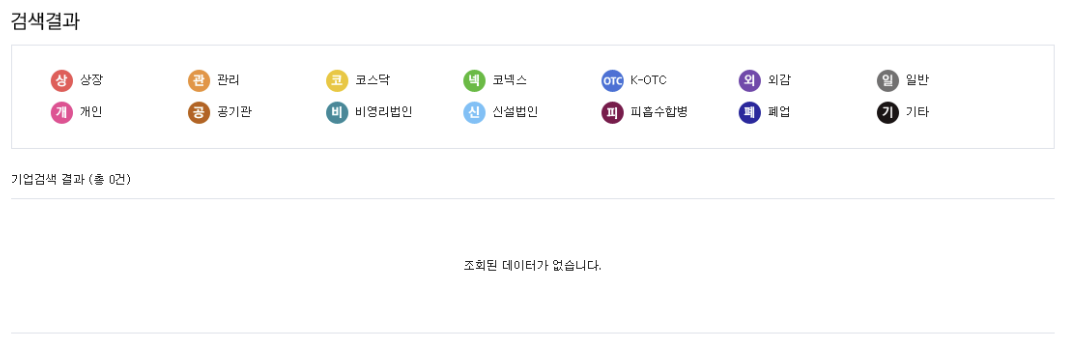

In [29]:
bizinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35709 entries, 0 to 35708
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사업자번호        35709 non-null  int64  
 1   address      34329 non-null  object 
 2   industry     34330 non-null  object 
 3   ind_rank     31300 non-null  float64
 4   payroll      28056 non-null  object 
 5   new_payroll  28056 non-null  object 
 6   employee     28056 non-null  object 
 7   employment   28056 non-null  object 
 8   resignation  28056 non-null  object 
 9   cmp_years    28056 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.7+ MB


In [30]:
bizinfo_df.isnull().sum()

사업자번호             0
address        1380
industry       1379
ind_rank       4409
payroll        7653
new_payroll    7653
employee       7653
employment     7653
resignation    7653
cmp_years      7653
dtype: int64

### - 조회는 되지만 주소가 없는 경우 : 1개
- address	1380, industry	1379로 1개의 차이가 나는 이유

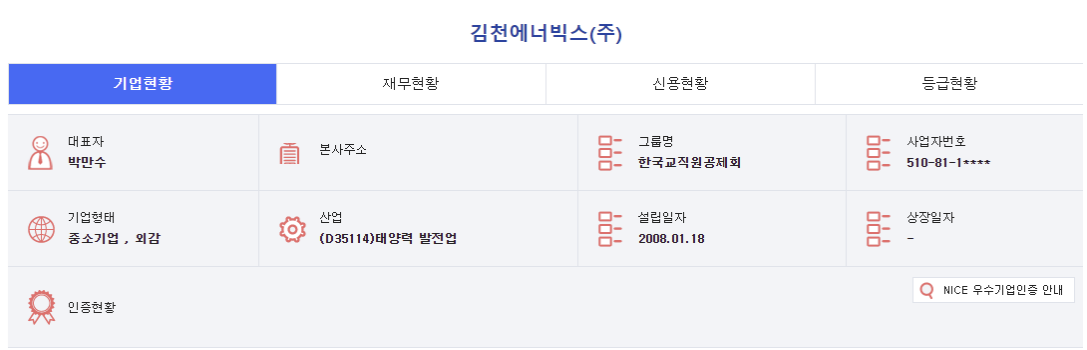

In [33]:
bizinfo_df[(bizinfo_df['address'].isnull()) & (bizinfo_df['industry'].notnull())]

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
26502,5108119835,NaN,(D35114)태양력 발전업,5.0,NaN,NaN,NaN,NaN,NaN,NaN


### - 주소, 산업분류는 있지만 기업정보 상세보기(연봉현황 및 산업현황 데이터)가 존재하지 않는 경우 : 6,274개

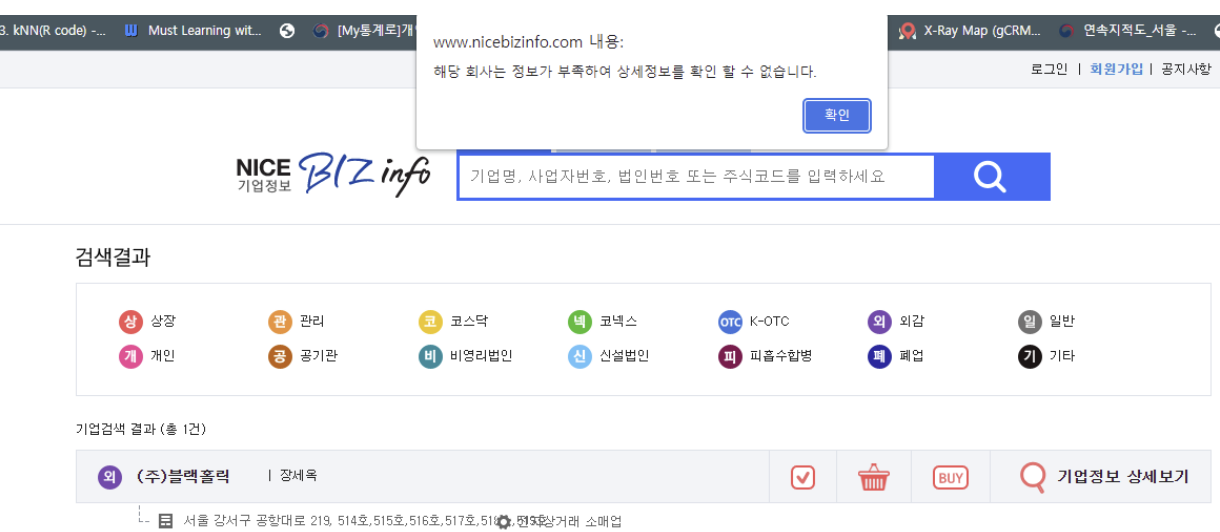

In [37]:
bizinfo_df[(bizinfo_df['payroll'].isnull()) & (bizinfo_df['industry'].notnull())]

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1018106586,서울 구로구 경인로53길 15,그 외 기타 기계 및 장비 도매업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1018119209,"서울 서대문구 서소문로 61-1, 303호",(I56123)서양식 음식점업,5.0,NaN,NaN,NaN,NaN,NaN,NaN
26,1018132686,"서울 성동구 성수이로 118, 1421호",(L68112)비주거용 건물 임대업,6.0,NaN,NaN,NaN,NaN,NaN,NaN
34,1018138657,"서울 중구 청계천로 100, 동관 15층",광고 대행업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35685,8978601542,"서울 서초구 강남대로 465, 20층",(L68122)비주거용 건물 개발 및 공급업,6.0,NaN,NaN,NaN,NaN,NaN,NaN
35701,8988800759,경기 김포시 대곶면 율마로 26,고체연료 및 관련제품 도매업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35703,8998600665,경남 양산시 어실로 461-1,(H52101)일반 창고업,6.0,NaN,NaN,NaN,NaN,NaN,NaN
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### - 주소, 산업분류, 연봉현황은 있지만  산업현황 데이터가 존재하지 않는 경우 : 397개
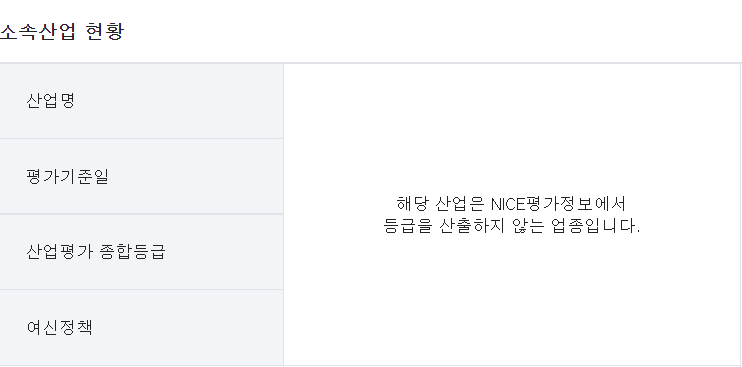

In [39]:
bizinfo_df[(bizinfo_df['ind_rank'].isnull()) & (bizinfo_df['payroll'].notnull())]

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
56,1018152794,"서울 중구 을지로5길 26, 서관 7층",(K66202)보험 대리 및 중개업,NaN,"4,000만원 이상 ~ 6,000만원 미만","~ 4,000만원 미만",20명 이상 ~ 40명 미만,36.67 % (11 ...,16.67 % (5 ...,- 년
75,1018164892,"서울 종로구 우정국로 26, 11층",(K66121)증권 중개업,NaN,"4,000만원 이상 ~ 6,000만원 미만","4,000만원 이상 ~ 6,000만원 미만",20명 이상 ~ 40명 미만,20.51 % (8 ...,25.64 % (10 ...,22 년
87,1018177155,대구 동구 장등로 86,(K64992)지주회사,NaN,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,33.33 % (1 ...,33.33 % (1 ...,21 년
91,1018179639,"서울 종로구 우정국로 26, 11층",(K64201)신탁업 및 집합투자업,NaN,"4,000만원 이상 ~ 6,000만원 미만","4,000만원 이상 ~ 6,000만원 미만",20명 이상 ~ 40명 미만,24.32 % (9 ...,21.62 % (8 ...,20 년
102,1018187707,"서울 영등포구 국제금융로 10, 30층",(K66121)증권 중개업,NaN,"4,000만원 이상 ~ 6,000만원 미만","4,000만원 이상 ~ 6,000만원 미만",40명 이상 ~ 70명 미만,20.00 % (9 ...,11.11 % (5 ...,20 년
...,...,...,...,...,...,...,...,...,...,...
35281,8578800404,"서울 강남구 논현로111길 23, 5층",(K64919)그 외 기타 여신금융업,NaN,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,0.00 % (0 ...,100.00 % (7 ...,6 년
35475,8768801189,"서울 강남구 선릉로125길 5, 3층",(K64919)그 외 기타 여신금융업,NaN,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,33.33 % (2 ...,0.00 % (0 ...,4 년
35496,8788801680,전북 남원시 사매면 산단로 98-39,(C23122)디스플레이 장치용 유리 제조업,NaN,"4,000만원 이상 ~ 6,000만원 미만","4,000만원 이상 ~ 6,000만원 미만",40명 이상 ~ 70명 미만,35.90 % (14 ...,25.64 % (10 ...,2 년
35612,8908600708,"서울 마포구 마포대로 38, 1506호",(K64992)지주회사,NaN,"4,000만원 이상 ~ 6,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,14.29 % (1 ...,28.57 % (2 ...,6 년
